1. so many columns and less( definately more than columns) number of rows = use svm

2. if so many rows and less numbber of columns : use logistic regression classifier

3. so less datapoints hon to SVM chose kro, more data-points hon to SVM take large time for finding the best hyperplane. So use logistic regression when so many datapoints hon

4. Loss function is used for determining the best parameters for model

5. In case of SVM, Hinge loss function is used, not the normal loss function. hinge loss is used in mostly for soft margin classifiers.

6. Cost function is associated with each datapoints. And Summation of all the costs makes loss function. Our ultimate goal is to minimize the loss function with change in parameters of the model w(weight vector) and b(bias value). We will follow gradient descent algorithm to minimise the loss function, not the random choise of weights and bias

# Building SVM Classifier from Scratch

Equation of the Hyperplane:

**y = wx - b** [ - or + both are same, b se -b man lo ]

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

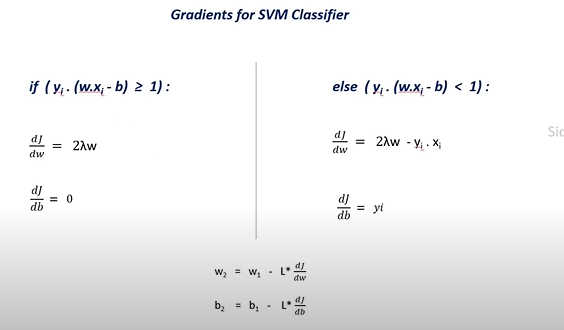

In [1]:
import numpy as np

In [5]:
class SVM_classifier():
  # defining the constructor
  # for initiating the hyperparameters : LR, and Number of iterations
  def __init__(self,learning_rate,number_of_iterations,lambda_parameter):
    self.learning_rate = learning_rate
    self.number_of_iterations = number_of_iterations
    self.lambda_parameter = lambda_parameter
    # object/instance ko sari values assign ho gyi jo input diya gya tha user dvara

  def fit(self, X,Y):
    # m - number of datapoints or rows
    # n - number of input features/ number of columns in X_train
    self.m, self.n = X.shape

    # initiating the weights and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing the gradient descent algorithm for w and b optimization.
    # gradient descent will always try to converge to nearby minima. So minima pr pahunchkr loop ka termination krna is a better choice, but let's skip that for now.
    # After reaching to minima, the gradient descent is not going to increase, chahe kitne extra and excess iterations kr dalo
    for i in range(self.number_of_iterations):
      self.update_weights()

  # function to update weight and bias
  def update_weights(self):
    # label encoding
    y_label = np.where(self.Y <=0 , -1, +1) # svm me label -1, +1 (0,1 won't work). #all 0 to -1

    for index, x_i in enumerate(self.X):
      condition = y_label[index]*(np.dot(x_i,self.w)-self.b)>=1
      # I want to use index, corresponding x_i simultaniously, hence enumerate use kiya
      if(condition == True):
        dw = 2*self.lambda_parameter*self.w
        db = 0
      else :
        dw = 2*self.lambda_parameter*self.w - np.dot(x_i , y_label[index])
        db = y_label[index]

      # dw ko single value samjhne ki koshish mt krna, wo n number of values hain jitne ki m. han b is only one value
      # dw is a numpy array(i.e. vector only). so "self.w=" like this krne pr pura array element wise modify ho rha hai, keep in mind this fact
      self.w = self.w - self.learning_rate*dw # numpy array
      self.b = self.b - self.learning_rate*db # single element
      # each time w and b update krna hai


  # predict the label for a given input value
  def predict(self, X):
    output = np.dot(X, self.w) - self.b
    predicted_labels = np.sign(output) # sign function, any positive ko +1, any negative to -1, and 0 ko 0 kr deta hai
    y_hat = np.where(predicted_labels <=-1, 0, 1)
    return y_hat # since input labels 0/1 the , so output bhi 0/1 kr diya




In [8]:
# enumerate kya krta hai

my_list = [10,20,30,40,50]

for i, my_list_i in enumerate(my_list):
  print(i, my_list_i)

# in order to wok on index as well as values corresponding to that index, we use enumerate

0 10
1 20
2 30
3 40
4 50


In [7]:
x1 = [5,-1,-4,-0.3,0.3,1,5,0] # list
x1=np.asarray(x1) # np array
x1 = np.sign(x1) # np array
print(x1)

[ 1. -1. -1. -1.  1.  1.  1.  0.]


# IMPLEMENTING THE BUILT SVM CLASSIFIER

In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [98]:
# data collection and processing
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [99]:
# print the first five rows of the dataframe
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
diabetes_data.shape

(768, 9)

In [101]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 -> non diabetic

1 -> diabetic

In [103]:
# separating the features and the target
features = diabetes_data.drop(columns = 'Outcome', axis=1)
target = diabetes_data['Outcome']

In [104]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [105]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [106]:
scaler = StandardScaler() # standard scaler ko ek object/instance me load kiya

In [107]:
scaler.fit(features)

StandardScaler()

In [108]:
standardized_data = scaler.transform(features)

In [109]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [110]:
# renaming the standardized_data as features again
features = standardized_data
# target toh still same and ok hi hai, no need to renaming

In [111]:
print(features)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [112]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 2, stratify = target)

In [113]:
print(target.shape, y_train.shape, y_test.shape)

(768,) (614,) (154,)


# training the model : SVM classifier that we have created

In [114]:
classifier = SVM_classifier(learning_rate=0.001, number_of_iterations=1000, lambda_parameter = 0.01)

In [115]:
# training the model "classifier" with x_train and y_train

In [116]:
classifier.fit(x_train, y_train)

Converged after 32 iterations.


Model Evaluation

In [117]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

In [118]:
training_data_accuracy

0.7833876221498371

In [119]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
test_data_accuracy

0.7662337662337663

In [120]:
# so training and testing pr accuracy 78 % and 77 % hai

Building a Predictive System

In [121]:
input_data = (6,148,72,35,0,33.6,0.627,50) # as a tuple hai, array me badalkr standardized krke model ko finally as a input dena hota hai

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data =scaler.transform(input_data_reshaped)
# remember this 1 row vali input table bhi , upar fit krne pr jo mean and variance aaya tha, uske hi basis pr standardized hogi
# esa nhi hoga ki apne alag mean and variance ke basis pr standardized ho, sinxe classifier.fit vhin pr ek bar run hua hai bs

print(std_data)

prediction = classifier.predict(std_data)

print(prediction)

if(prediction == 0):
  print("Person is not diabetic")
else:
  print("The person is diabetic")

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


lambda_parameter is a regularizing parameter. In the case of SVM, the regularization term helps to find a balance between maximizing the margin (distance between the support vectors and the decision boundary) and minimizing the classification error.(misclassifications)

# In the above code, adding condition to stop the for loop iteration, when the minima of loss function is reached.

In [96]:
import numpy as np

class SVM_classifier():
    # defining the constructor
    # for initiating the hyperparameters: learning_rate, number_of_iterations, and lambda_parameter
    def __init__(self, learning_rate, number_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
        self.lambda_parameter = lambda_parameter
        # object/instance ko sari values assign ho gyi jo input diya gya tha user dvara

    def fit(self, X, Y):
        # m - number of datapoints or rows
        # n - number of input features/number of columns in X_train
        self.m, self.n = X.shape

        # initiating the weights and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        prev_loss = float('inf')  # Initialize with a large value

        for i in range(self.number_of_iterations):
            self.update_weights()
            current_loss = self.calculate_loss()

            if abs(prev_loss - current_loss) < 1e-6 : # jb converge karvaoge dataset ko, tb ye line dekhne ko milegi, abhi nhi
                print(f"Converged after {i} iterations.")
                break

            prev_loss = current_loss

    # function to update weight and bias
    def update_weights(self):
        # label encoding
        y_label = np.where(self.Y <= 0, -1, 1)

        for index, x_i in enumerate(self.X):
            condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
            if condition:
                dw = 2 * self.lambda_parameter * self.w
                db = 0
            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
                db = y_label[index]

            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

    # Add a method to calculate the loss
    def calculate_loss(self):
        y_label = np.where(self.Y <= 0, -1, 1)
        hinge_loss = 1 - y_label * (np.dot(self.X, self.w) - self.b)
        hinge_loss = np.maximum(0, hinge_loss)  # max(0, 1 - y(w*x - b))
        regularization_term = self.lambda_parameter * np.dot(self.w, self.w)
        loss = regularization_term + np.mean(hinge_loss)
        return loss

    # predict the label for a given input value
    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        predicted_labels = np.sign(output)
        y_hat = np.where(predicted_labels <= -1, 0, 1)
        return y_hat



The code you provided is for a soft-margin SVM classifier. Here's why:

1. **Regularization Parameter (lambda_parameter):** In a soft-margin SVM, a regularization term is used to control the trade-off between maximizing the margin and minimizing the classification error. The `lambda_parameter` in your code is used for regularization. In a hard-margin SVM, this regularization term is typically not present or set to a very large value (effectively reducing it to a hard-margin SVM).

2. **Hinge Loss and Margin:** The hinge loss, which is used in your `calculate_loss` method, is a characteristic of soft-margin SVMs. In a hard-margin SVM, there is no concept of hinge loss because the margin is required to be perfect (i.e., all data points must be correctly classified with a margin of at least 1). In a soft-margin SVM, the hinge loss allows for some misclassification, and the margin doesn't need to be perfect.

3. **Convergence Criteria:** The code includes a condition to stop the iteration when the loss converges. This is a common characteristic of soft-margin SVM training. In a hard-margin SVM, convergence usually occurs very quickly, as it seeks a perfect margin with no misclassifications.

Therefore, the presence of the regularization term, hinge loss, and the convergence condition in your code indicates that it's implementing a soft-margin SVM, which is more flexible and allows for some misclassification to handle noisy or overlapping data.